## Binary Classification with a Software Defects Dataset. 

#### The goal of this dataset project is to predict defects in C programs given various attributes about the code. The dataset was generated from a deep learning model trained on the Software Defect Dataset. Feature distributions are close to, but not exactly the same, as the original. 

In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 18.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 29.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 45.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Get number of rows and columns
print("Training Data:")
print(f"Rows: {train_data.shape[0]}, Columns: {train_data.shape[1]}")

print("Testing Data:")
print(f"Rows: {test_data.shape[0]}, Columns: {test_data.shape[1]}")


Training Data:
Rows: 101763, Columns: 23
Testing Data:
Rows: 67842, Columns: 22


In [3]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())



Missing Values in Training Data:
id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Missing Values in Testing Data:
id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0


In [4]:
# Create a summary table for features
summary = []
for col in train_data.columns:
    feature_info = {
        'Feature': col,
        'Type': 'Categorical' if train_data[col].dtype == 'object' else 'Numerical',
        'Unique Values': train_data[col].unique() if train_data[col].nunique() <= 10 else "Too many to display",
        'Range/Values': f"{train_data[col].min()} - {train_data[col].max()}" if train_data[col].dtype != 'object' else "N/A",
        'Missing Values': train_data[col].isnull().sum()
    }
    summary.append(feature_info)

# Convert summary to a DataFrame and display
summary_df = pd.DataFrame(summary)
print("\nFeature Summary:")
print(summary_df)


Feature Summary:
              Feature       Type        Unique Values       Range/Values  \
0                  id  Numerical  Too many to display         0 - 101762   
1                 loc  Numerical  Too many to display       1.0 - 3442.0   
2                v(g)  Numerical  Too many to display        1.0 - 404.0   
3               ev(g)  Numerical  Too many to display        1.0 - 165.0   
4               iv(g)  Numerical  Too many to display        1.0 - 402.0   
5                   n  Numerical  Too many to display       0.0 - 8441.0   
6                   v  Numerical  Too many to display     0.0 - 80843.08   
7                   l  Numerical  Too many to display          0.0 - 1.0   
8                   d  Numerical  Too many to display        0.0 - 418.2   
9                   i  Numerical  Too many to display       0.0 - 569.78   
10                  e  Numerical  Too many to display  0.0 - 16846621.12   
11                  b  Numerical  Too many to display        0.0 - 26.

In [5]:
# Filter numeric columns
numeric_columns = train_data.select_dtypes(include=["number"]).columns

# Outlier detection function
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    return outliers

train_data_outliers = {col: detect_outliers(train_data, col) for col in numeric_columns}

# Display outliers
outliers_summary = [{'Feature': col, 'Outliers Count': count} for col, count in train_data_outliers.items()]
outliers_df = pd.DataFrame(outliers_summary)

print("\nOutliers Summary:")
print(outliers_df)


Outliers Summary:
              Feature  Outliers Count
0                  id               0
1                 loc            8954
2                v(g)            9029
3               ev(g)           10855
4               iv(g)            6954
5                   n            7834
6                   v            8883
7                   l            5192
8                   d            5490
9                   i            4885
10                  e           12436
11                  b            8422
12                  t           12433
13             lOCode            8212
14          lOComment           17460
15            lOBlank            6449
16  locCodeAndComment            8213
17            uniq_Op             759
18          uniq_Opnd            5686
19           total_Op            7967
20         total_Opnd            7919
21        branchCount            8891


In [7]:
# Check for class imbalance
target_distribution = train_data['defects'].value_counts(normalize=True)
print("\nTarget Distribution:")
print(target_distribution)


Target Distribution:
defects
False    0.773356
True     0.226644
Name: proportion, dtype: float64


In [8]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [20]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.7 MB/s eta 0:00:00a 0:00:01


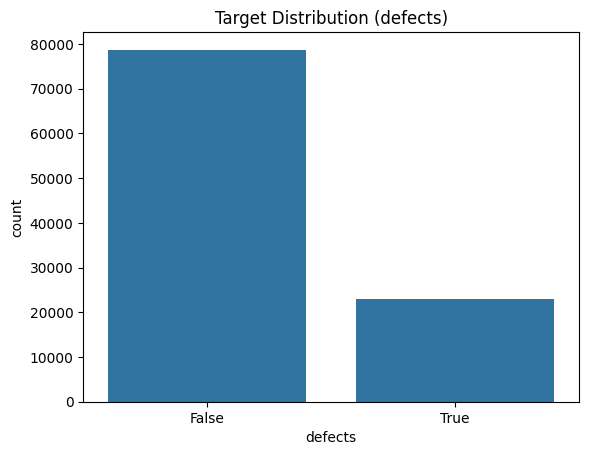

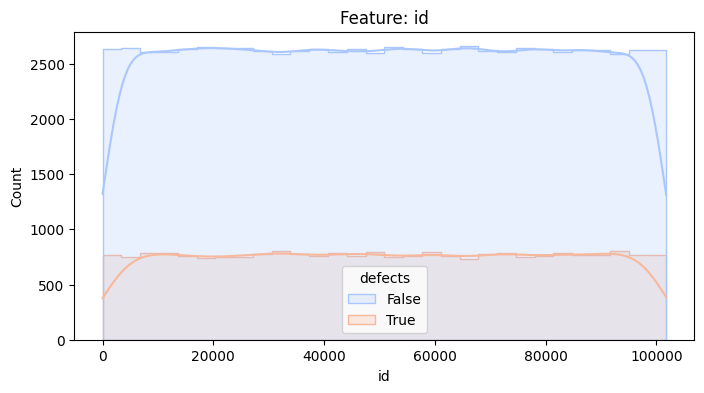

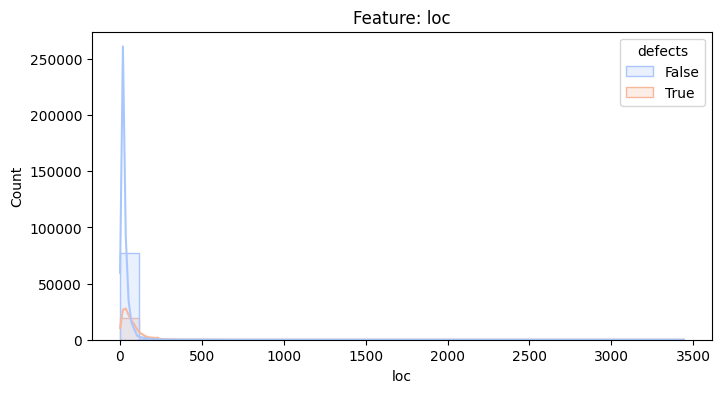

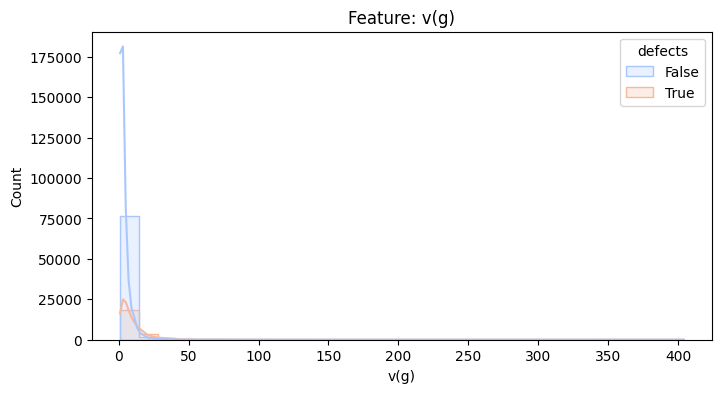

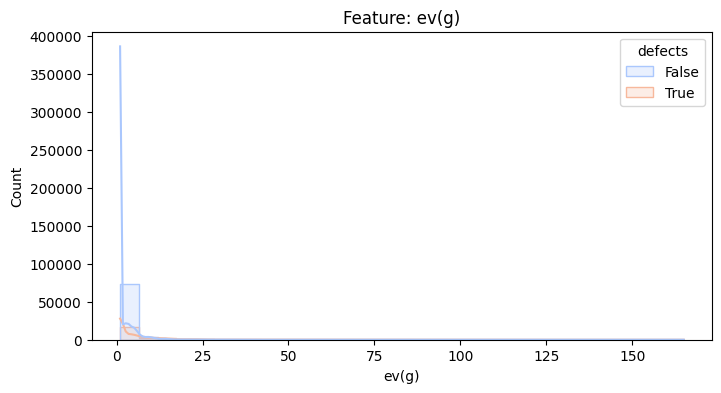

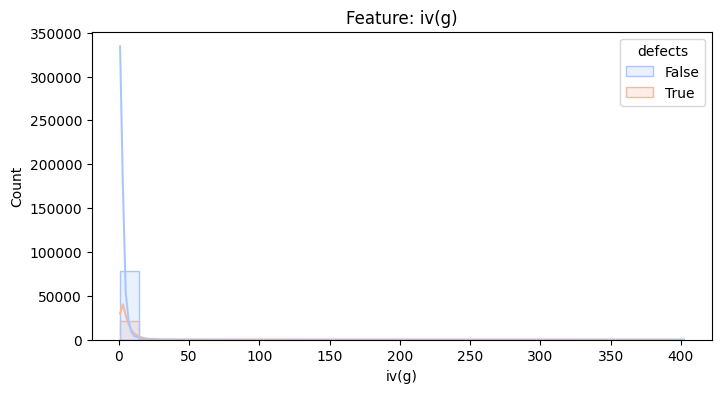

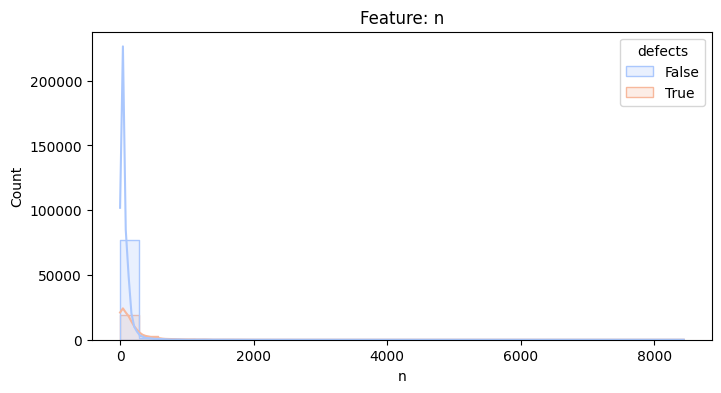

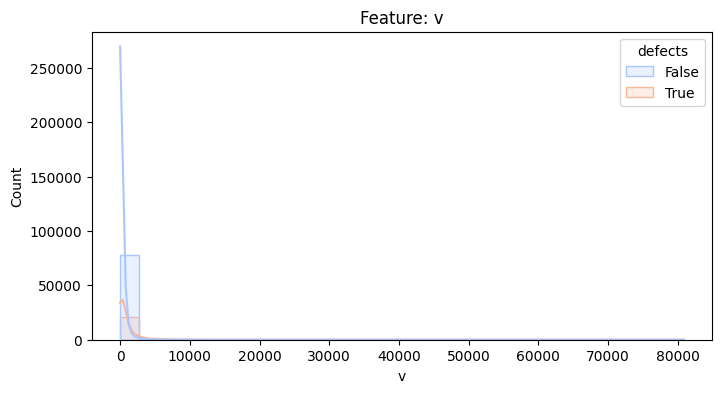

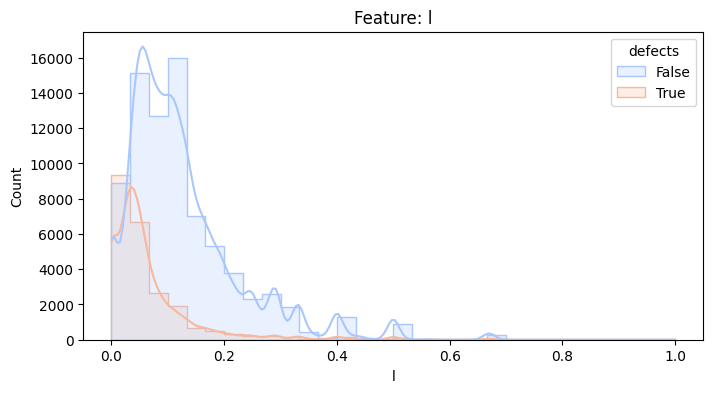

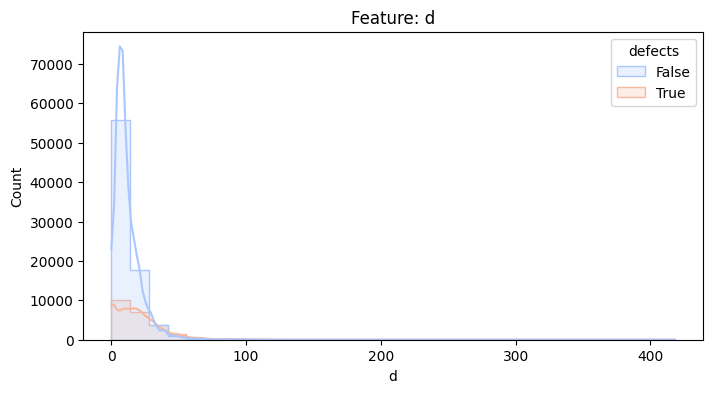

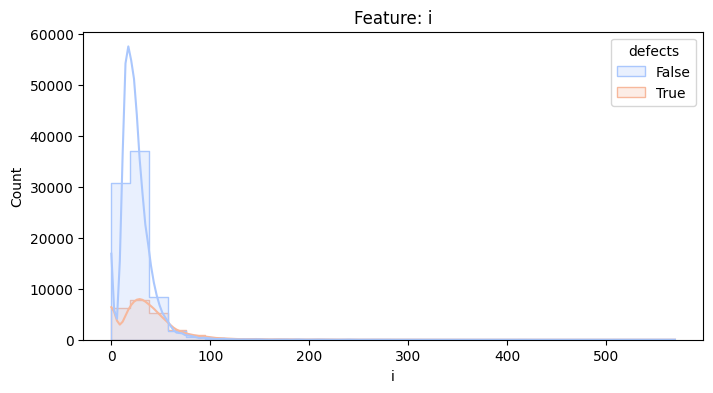

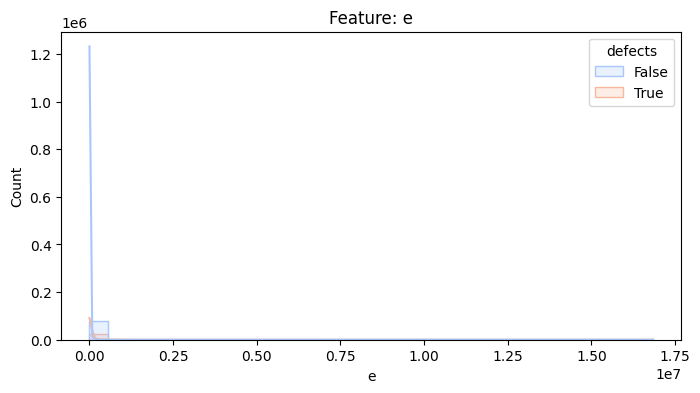

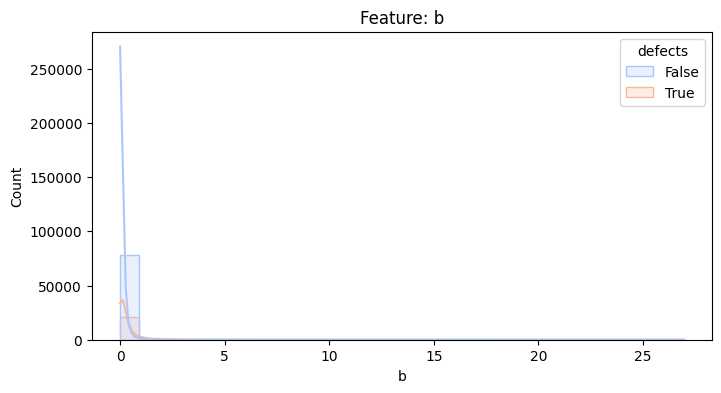

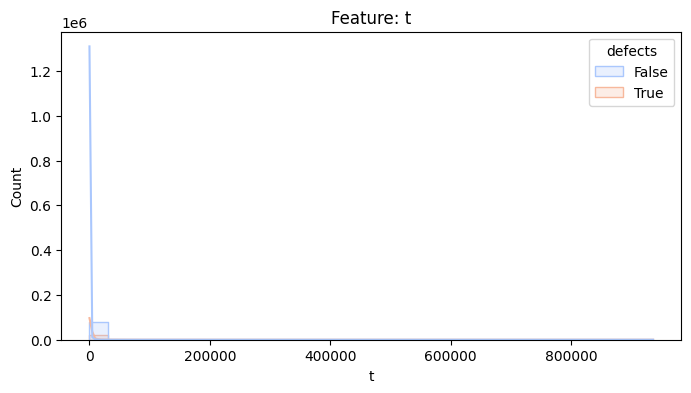

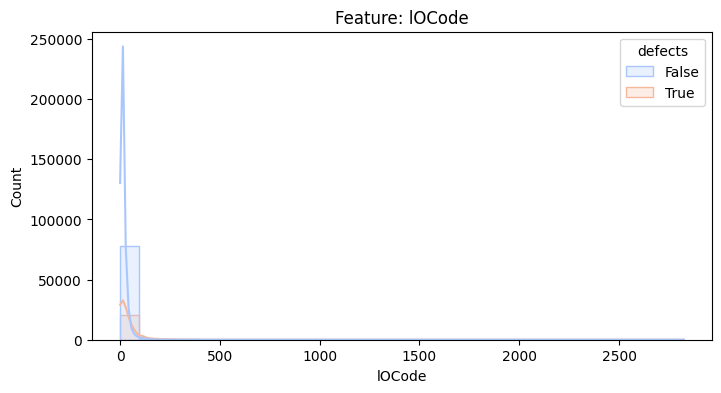

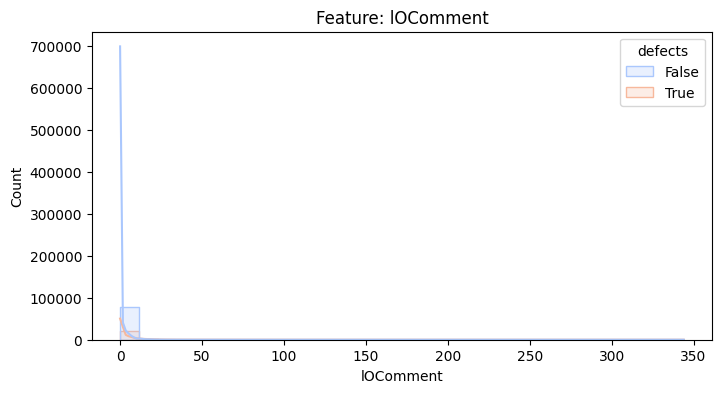

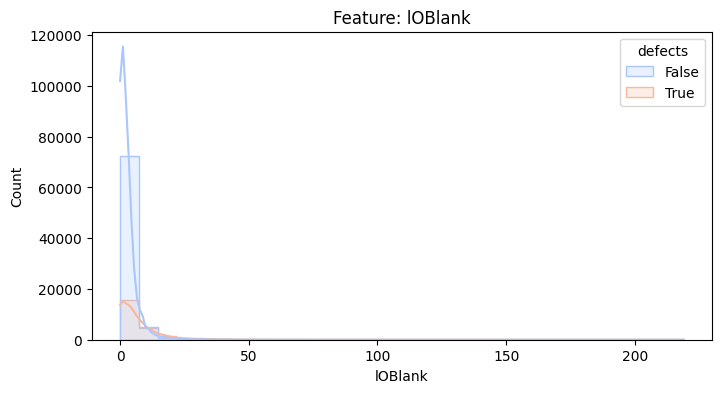

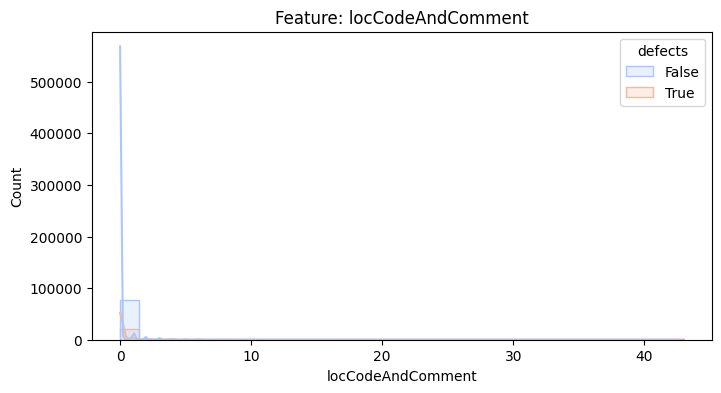

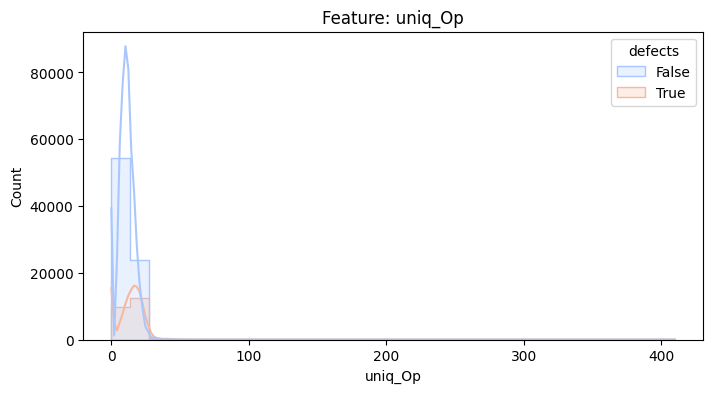

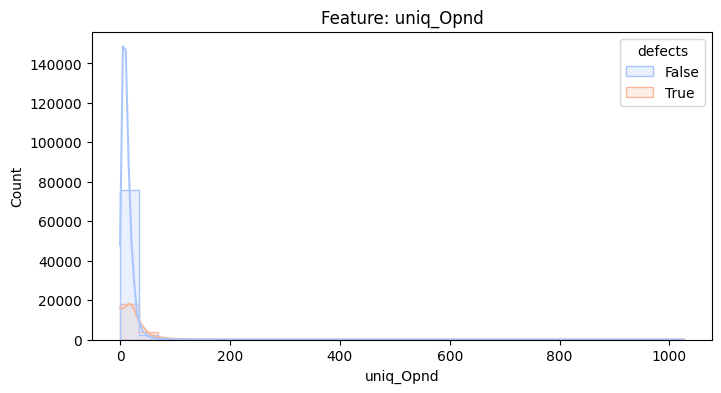

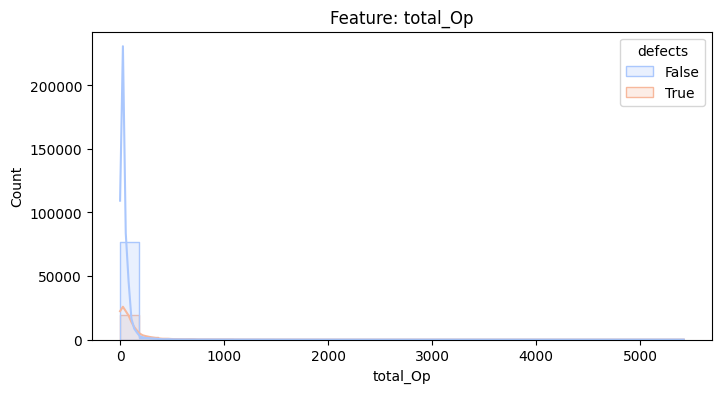

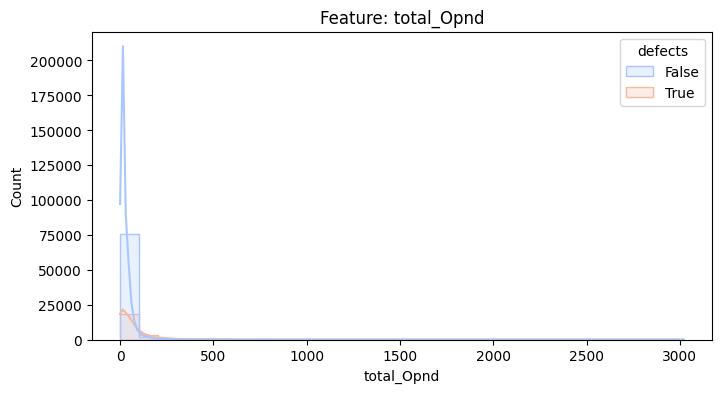

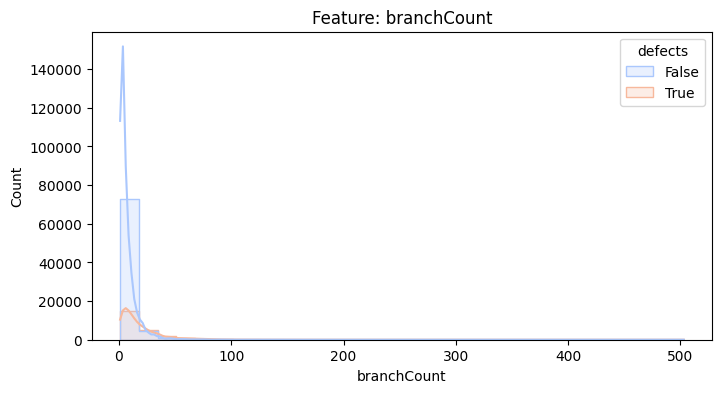

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize target distribution
sns.countplot(x='defects', data=train_data)
plt.title('Target Distribution (defects)')
plt.show()

# Compare histograms of features between classes
for col in train_data.columns:
    if col != 'defects' and train_data[col].dtype != 'object':
        plt.figure(figsize=(8, 4))
        sns.histplot(data=train_data, x=col, hue='defects', kde=True, bins=30, palette='coolwarm', element="step")
        plt.title(f"Feature: {col}")
        plt.show()

## 3. Data Cleaning and Preparation for Machine Learning

In [3]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 16.8 MB/s eta 0:00:00


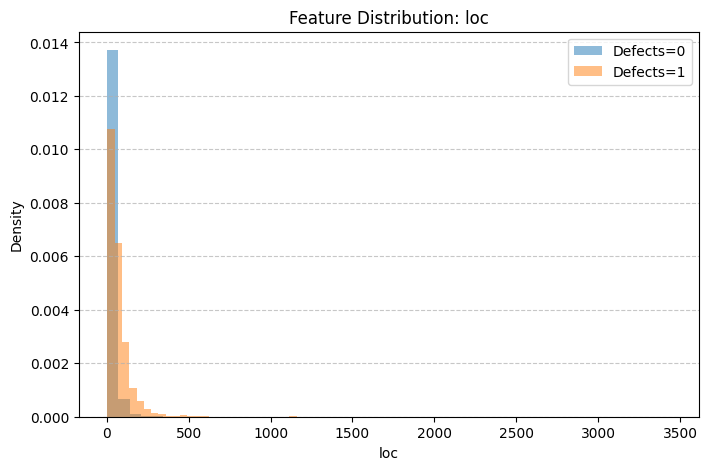

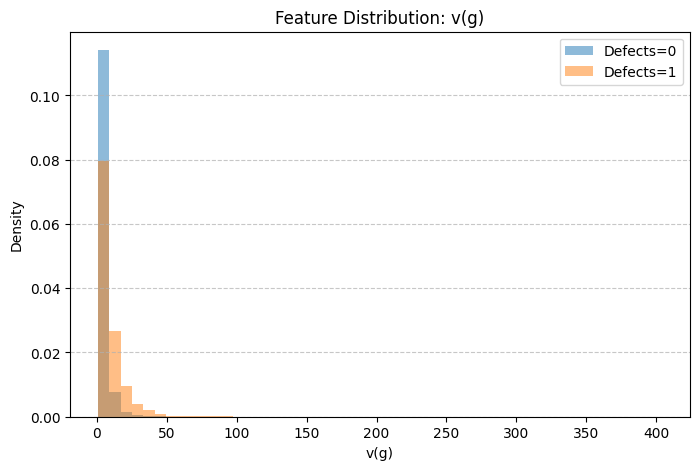

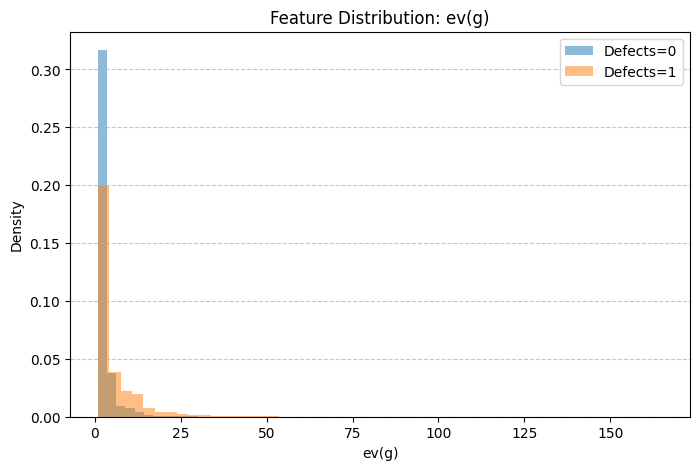

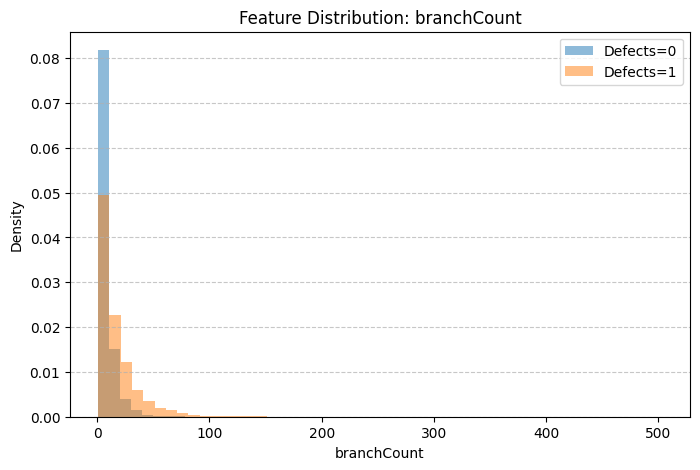

In [9]:
# Visualize feature distributions split by target (defects)
important_features = ['loc', 'v(g)', 'ev(g)', 'branchCount']  # Sample subset for visualization

for feature in important_features:
    plt.figure(figsize=(8, 5))
    for label in [0, 1]:
        subset = train_data[train_data['defects'] == label]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=f'Defects={label}', density=True)
    
    plt.title(f'Feature Distribution: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

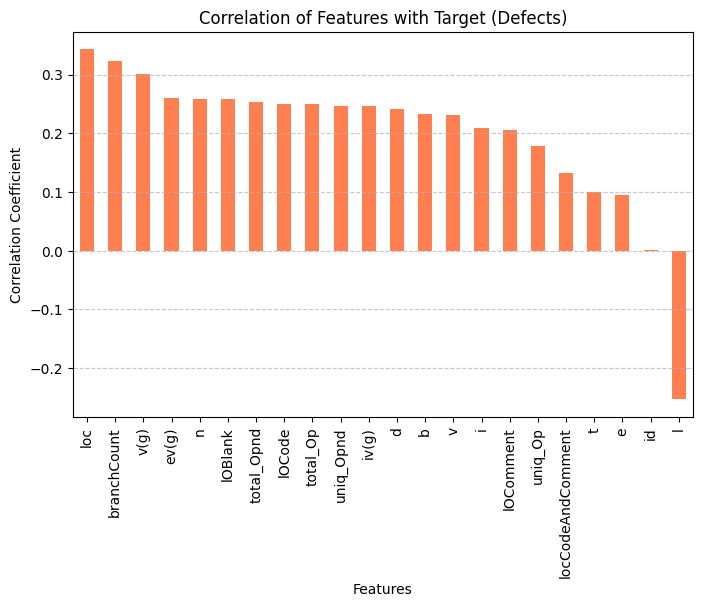

defects        1.000000
loc            0.342642
branchCount    0.322827
v(g)           0.301187
ev(g)          0.259928
n              0.258080
lOBlank        0.257819
total_Opnd     0.252752
lOCode         0.250604
total_Op       0.250533
Name: defects, dtype: float64

In [10]:
# Compute and visualize correlations of numerical features with the target variable
correlation_with_target = train_data.corr()['defects'].sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(8, 5))
correlation_with_target.drop('defects').plot(kind='bar', color='coral')
plt.title('Correlation of Features with Target (Defects)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display top correlated features with the target variable
correlation_with_target.head(10)

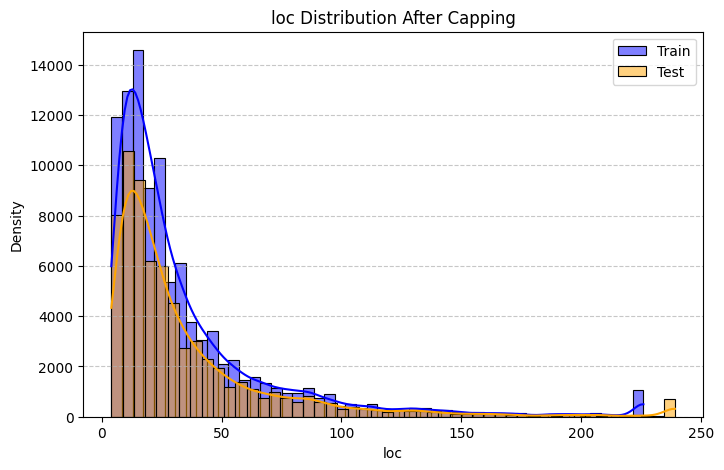

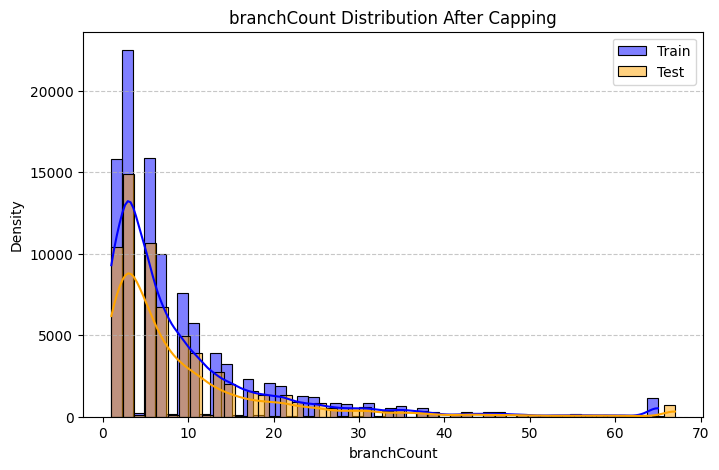

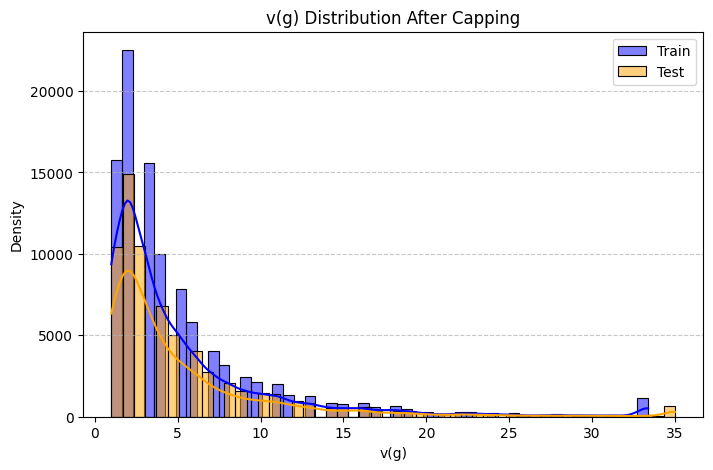

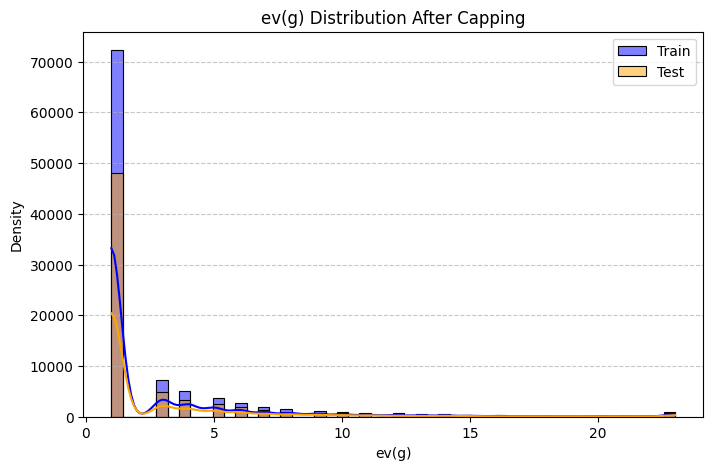

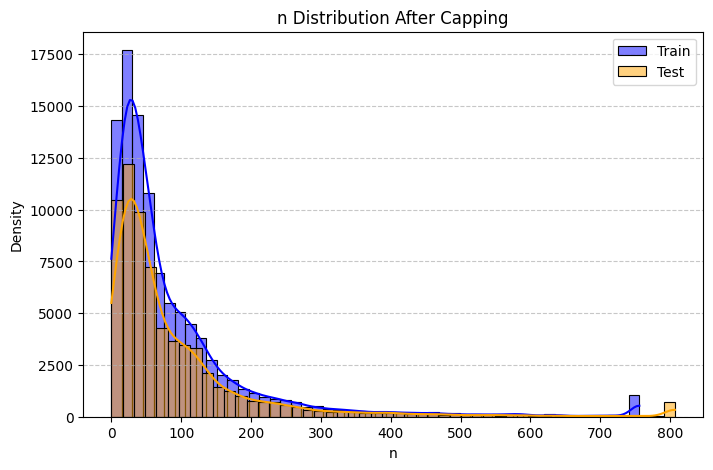

In [11]:
# Define a function to cap outliers at a specified percentile
def cap_outliers(df, features, lower_percentile=0.01, upper_percentile=0.99):
    for feature in features:
        lower_bound = df[feature].quantile(lower_percentile)
        upper_bound = df[feature].quantile(upper_percentile)
        df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers in the train and test datasets for the top features
features_to_cap = ['loc', 'branchCount', 'v(g)', 'ev(g)', 'n']
train_data = cap_outliers(train_data, features_to_cap)
test_data = cap_outliers(test_data, features_to_cap)

# Visualize distributions after capping
for feature in features_to_cap:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature], bins=50, kde=True, color='blue', label='Train')
    sns.histplot(test_data[feature], bins=50, kde=True, color='orange', label='Test')
    plt.title(f'{feature} Distribution After Capping')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

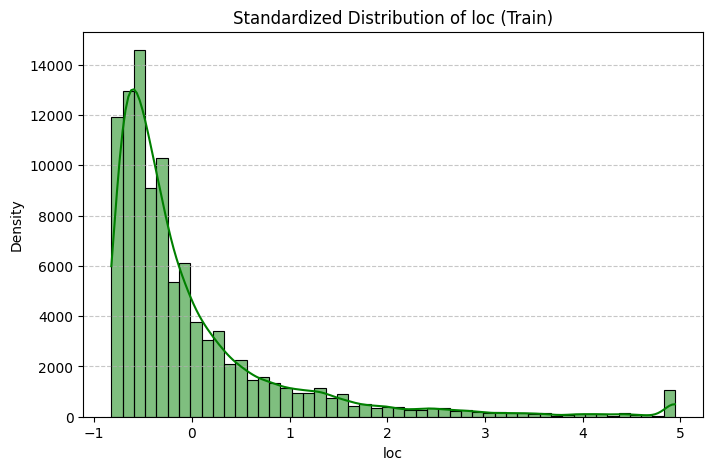

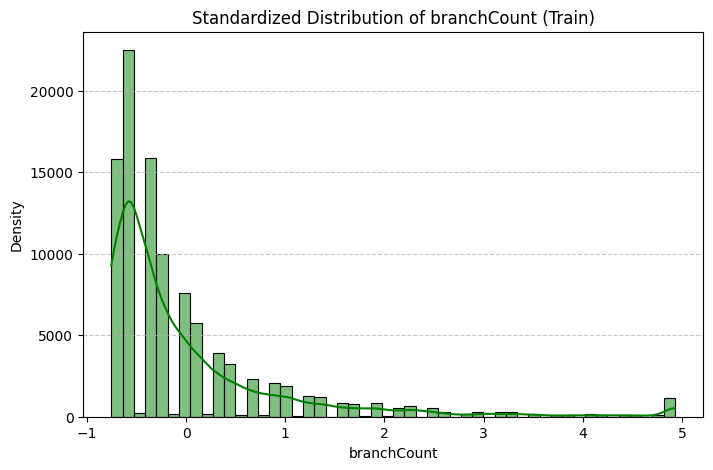

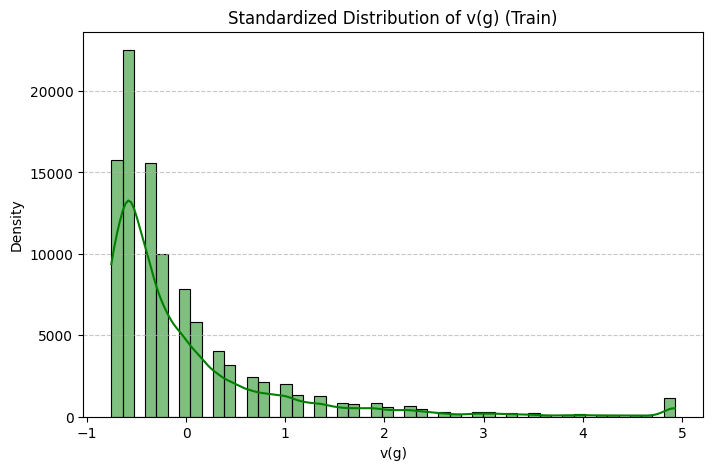

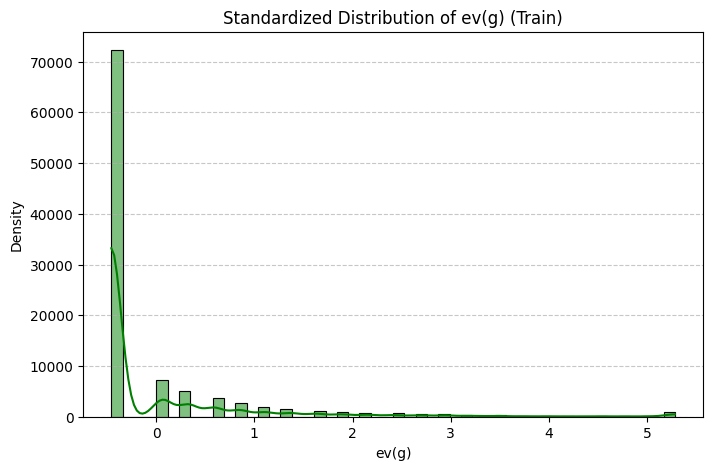

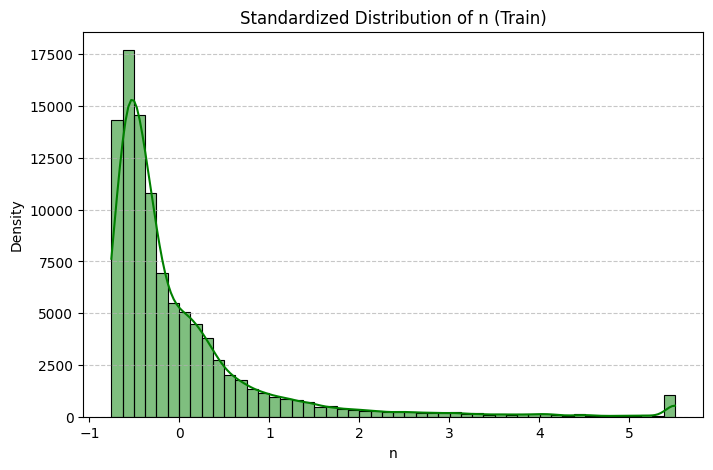

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features in both train and test datasets
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[features_to_cap])

# Replace the original columns with scaled values in the training dataset
train_data[features_to_cap] = scaled_features

# Apply the same scaler to the test dataset
scaled_test_features = scaler.transform(test_data[features_to_cap])
test_data[features_to_cap] = scaled_test_features

# Visualize the standardized features in the training dataset
for feature in features_to_cap:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature], bins=50, kde=True, color='green')
    plt.title(f'Standardized Distribution of {feature} (Train)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## 4. Machine Learning

In [13]:
'''
# Separate features and target
X = train_data.drop(columns=['defects'])  # Features
y = train_data['defects']  # Target

# Split the training data into train, validation, and test subsets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data split complete:")
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
'''

from sklearn.model_selection import train_test_split

# Separate features and target in the training dataset
X = train_data.drop(columns=['id', 'defects'])  # Drop the ID and target columns
y = train_data['defects']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Output the size of each dataset
(X_train.shape, X_val.shape, X_test.shape)

((71234, 21), (15264, 21), (15265, 21))

#### Machine Learning Model Training

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
classification_rep = classification_report(y_val, y_val_pred)

(accuracy, roc_auc, classification_rep)

(0.8068003144654088,
 np.float64(0.7715517983459411),
 '              precision    recall  f1-score   support\n\n       False       0.83      0.94      0.88     11805\n        True       0.64      0.34      0.45      3459\n\n    accuracy                           0.81     15264\n   macro avg       0.73      0.64      0.66     15264\nweighted avg       0.79      0.81      0.78     15264\n')

### Random Forest Model Performance
Accuracy: 81%

ROC-AUC: 77%

## False (0):

Precision: 83% 
Recall: 94% 
F1-Score: 88% 

## True (1):

Precision: 64% 
Recall: 34% 
F1-Score: 45% 

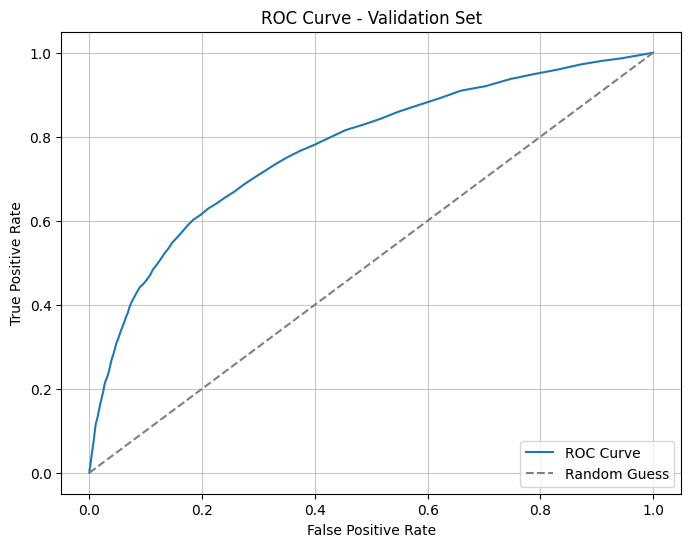

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the ROC curve for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title("ROC Curve - Validation Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.7)
plt.show()

#### Apply ML Model to Test Set and Generate Submission

In [20]:
# Generate predictions for the test dataset
test_predictions_proba = rf_model.predict_proba(test_data.drop(columns=['id']))[:, 1]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'defects': test_predictions_proba
})

# Save the submission file
submission_file_path = 'software_defects_submission.csv'
submission.to_csv(submission_file_path, index=False)

submission_file_path

'software_defects_submission.csv'